# SF1626 Lecture highlights: Chapter 15
by [Richard Tsai](https://www.researchgate.net/profile/Richard_Tsai3)

Lecture 1: 15.1, 15.2

Lecture 2: 15.3, 15.4

Lecture 3: 15.5, 15.6

## Chap 15.1 Vector fields and Streamlines

As usual, in this course, we only work with the standard basis in $\mathbb{R}^d$, $d=2,3$.

Def: A vector field in $\mathbb{R}^2$ is a function $\mathbf{F}:\mathbb{R}^2\mapsto\mathbb{R}^2$

$$\mathbf{F}(x,y)= F_1(x,y)\mathbf{i}+ F_2(x,y)\mathbf{j}$$

So at every point in the domain, $\mathbf{F}$ is a vector (direction+magnitude).

* Example: The description of wind in the weatehr report

Def: a cruve whose tangents are prescribed by $\mathbf{F}$ is called a **streamline** of $\mathbf{F}$.

* Imagine a particle whose trajectory is described by $\vec\gamma(t)$. The trajectory is a streamline of $\mathbf{F}$ if the differential equation is satisfied

$$ \vec\gamma^\prime(t) = \mathbf{F}\circ\vec\gamma(t) $$

$$\vec\gamma(t)= (\gamma_1(t), \gamma_2(t)),~~~$$

$$F\circ\vec\gamma(t) \equiv F(\gamma_1(t),\gamma_2(t))\equiv F(\gamma(t))$$

In the book, the streamline equation of $\mathbf{F}$ is described with an additional scaling factor, $\lambda(t)$:

$$ \vec\gamma^\prime(t) = \lambda(t)\mathbf{F}\circ\vec\gamma(t) $$

The differential equation can also be written in the form:

(The change is the x-component, divided by $F_1$ is the same as the other similar terms) 

$$\frac{dx}{F_1(x,y,z)}=\frac{dy}{F_2(x,y,z)}=\frac{dz}{F_3(x,y,z)}$$

$$\vec\gamma(t) = ( x(t), y(t), z(t) ),~~~~\mathbf{F}(x,y,z)=(F_1(x,y,z), F_2(x,y,z),F_3(x,y,z))$$

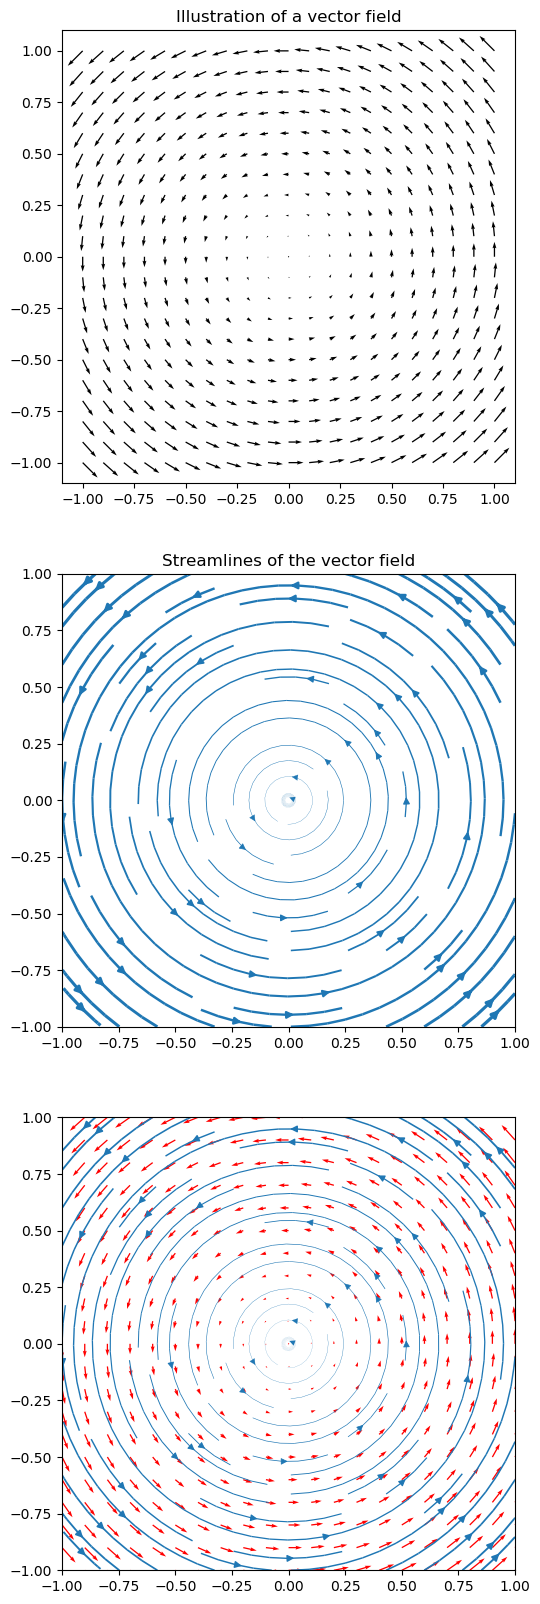

(-1.0, 1.0000000000000018, -1.0000000000000007, 1.000000000000001)

In [91]:
#Example 2: Gravitational field of a point mass
using PyPlot

Y= repeat( range(-1, stop=1, length=21), 1, 21)
X= repeat( vec(range(-1, stop=1, length=21))', 21, 1) 

Ω=π/40

v1(x,y)= -Ω*y
v2(x,y)=  Ω*x

V1=v1.(X,Y)
V2=v2.(X,Y)

#pygui(false)
fig = figure("A vector field and its streamlines",figsize=(20,20))

subplot(311)
quiver(X, Y, V1, V2)
title("Illustration of a vector field")
axis("square")

subplot(313)
quiver(X, Y, V1, V2, color="red")

subplot(312)
Y= repeat( range(-1, stop=1, length=101), 1, 101)
X= repeat( vec(range(-1, stop=1, length=101))', 101, 1) #copy(Y')

speed=sqrt.(v1.(X,Y).^2+v2.(X,Y).^2);
lw = 2.5 * speed / maximum(speed) # Line Widths
streamplot(X, Y, v1.(X,Y), v2.(X,Y), density=0.86, linewidth=lw)
title("Streamlines of the vector field")
axis("square")

subplot(313)
lw = 1.5 * speed / maximum(speed) # Line Widths
streamplot(X, Y, v1.(X,Y), v2.(X,Y), density=0.86, linewidth=lw)
axis("square")

Add `using LinearAlgebra` to your imports.
  likely near /Users/ytsai/.julia/packages/IJulia/4VL8h/src/kernel.jl:41
Add `using LinearAlgebra` to your imports.
  likely near /Users/ytsai/.julia/packages/IJulia/4VL8h/src/kernel.jl:41
Add `using LinearAlgebra` to your imports.
  likely near /Users/ytsai/.julia/packages/IJulia/4VL8h/src/kernel.jl:41
Add `using LinearAlgebra` to your imports.
  likely near /Users/ytsai/.julia/packages/IJulia/4VL8h/src/kernel.jl:41
Add `using LinearAlgebra` to your imports.
  likely near /Users/ytsai/.julia/packages/IJulia/4VL8h/src/kernel.jl:41
Add `using LinearAlgebra` to your imports.
  likely near /Users/ytsai/.julia/packages/IJulia/4VL8h/src/kernel.jl:41
Add `using LinearAlgebra` to your imports.
  likely near /Users/ytsai/.julia/packages/IJulia/4VL8h/src/kernel.jl:41
Add `using LinearAlgebra` to your imports.
  likely near /Users/ytsai/.julia/packages/IJulia/4VL8h/src/kernel.jl:41
in #43 at In[94]


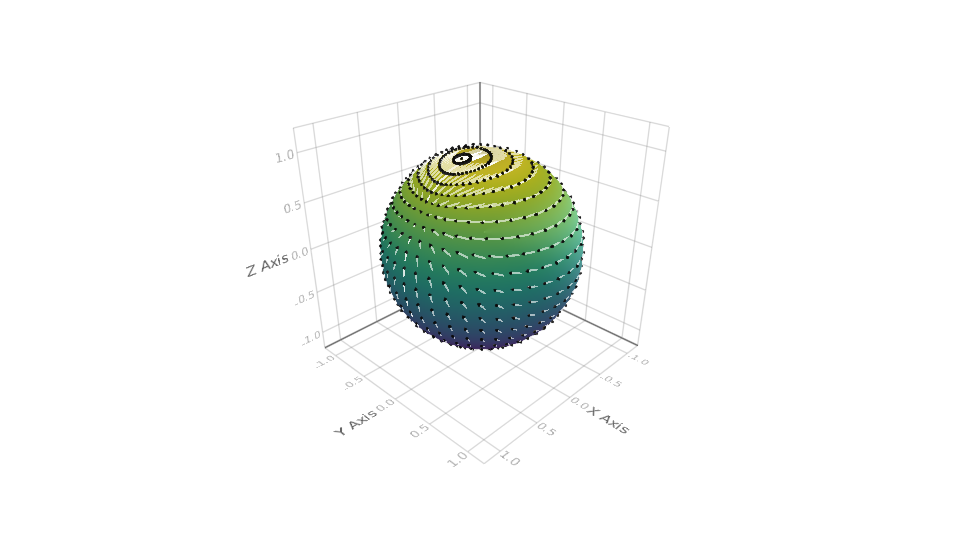

In [94]:
using LinearAlgebra
using Makie

n = 20
f   = (x,y,z) -> x*exp(cos(y)*z)
∇f  = (x,y,z) -> Point3f0(exp(cos(y)*z), -sin(y)*z*x*exp(cos(y)*z), x*cos(y)*exp(cos(y)*z))
∇ˢf = (x,y,z) -> ∇f(x,y,z) - Point3f0(x,y,z)*dot(Point3f0(x,y,z), ∇f(x,y,z))

θ = [0;(0.5:n-0.5)/n;1]
φ = [(0:2n-2)*2/(2n-1);2]
x = [cospi(φ)*sinpi(θ) for θ in θ, φ in φ]
y = [sinpi(φ)*sinpi(θ) for θ in θ, φ in φ]
z = [cospi(θ) for θ in θ, φ in φ]

pts = vec(Point3f0.(x, y, z))
∇ˢF = vec(∇ˢf.(x, y, z)) .* 0.1f0
surface(x, y, z)
arrows!(
    pts, ∇ˢF,
    arrowsize = 0.03, linecolor = (:white, 0.6), linewidth = 3
)

Do Examples 3, 4 (p870)

### Vector fields in polar coordinates


$$\mathbf{F}(r,\theta) = F_1(r,\theta)~\vec{\mathbf{r}}+F_2(r,\theta)~\vec{\mathbf{\theta}}$$

where the basis vectors are related to the standard basis vectors as the followings:

$$\begin{align} \vec{\mathbf{r}} &:= ~~\cos\theta~\mathbf{i} + \sin\theta~\mathbf{j}\\
                   \vec{\mathbf{\theta}} &:= -\sin\theta~\mathbf{i} + \cos\theta~\mathbf{j}\end{align}$$
                   
                   
Let's how the vector field $$\mathbf{F}(r,\theta) = r~\vec{\mathbf{r}}+\theta~\vec{\mathbf{\theta}}$$ looks like on the x-y plane.

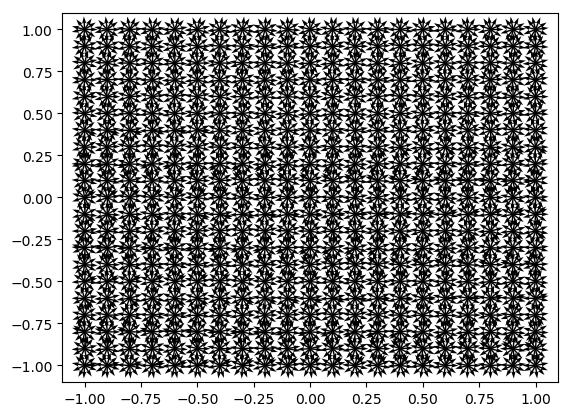

PyObject <matplotlib.quiver.Quiver object at 0x155574940>

In [96]:
r= range(0, stop=1, length=51)
θ= range(0, stop=2π, length=101)

Y= repeat( range(-1, stop=1, length=21), 1, 21)
X= repeat( vec(range(-1, stop=1, length=21))', 21, 1) 

Xr=[ cos(tj) for ri in r, tj in θ]
Yr=[ sin(tj) for ri in r, tj in θ]

Xt=[ -sin(tj) for ri in r, tj in θ]
Yt=[  cos(tj) for ri in r, tj in θ]

quiver(X, Y, Xr, Yr)

## Chap 15.2 Conservative vector fields

You need to know the meanings of **conservative vecor fields" and "potential functions**

Definition 1 (p874): 

$$\mathbf{F}(x,y,z) = \nabla\phi(x,y,z),~~~~~~(x,y,z)\in D.$$

* $\mathbf{F}$ is called a **conservative vector field**
* $\phi$ is a **potential** for $\mathbf{F}$

In the form of *differential*: 

$$d\phi = F_1(x,y,z)~dx + F_2(x,y,z)~dy+F_3(x,y,z)~dz$$

Do Example 1 (p875) The potential function for the gravitational field

### Necessary conditions for a conservative vector field in 2D and 3D

This is based on the equivalence of second order partial derivatives of $\phi$

### Sources, sinks and dipoles


In [ ]:
Do a few examples: Example 3, Example 6 (p881)

## Chap 15.3 Line integrals

I will use $\gamma$ in place of $\mathbf{r}$ used in the book.

The formula to understand:

$$\int_\mathcal{C} f(x,y,z) ds = \int_a^b f(\gamma(t))\left| \frac{d\gamma}{dt}\right|dt$$

* Integrate $f$ along the curve, $\mathcal{C}$, parameterized as $\gamma(t)$ for $a\le t\le b$.

You need to udnerstand:
* **What is $ds$, the arc length element**?
* **How is $ds$ related to $dt$**?

A special case: $f\equiv 1$, $\int_\mathcal{C} 1 ds = $ the length of the curve $\mathcal{C}$. 

In [16]:
using PyPlot
using LinearAlgebra

Γ(t)   =[cos(t/2); sin(t/2)]
dΓdt(t)=[ -sin(t/2)/2; cos(t/2)/2]

t=range(0, stop=2π, length=201)

sum1=0.0
sum2=0.0

for i=2:length(t)
    Δt=t[i]-t[i-1]
    ΔΓ = norm( Γ(t[i])-Γ(t[i-1]) ) 
    
    sum1+= ΔΓ
    sum2+= norm(dΓdt(t[i]))*Δt
    
end

display( [sum1 sum2])

1×2 Array{Float64,2}:
 3.14156  3.14159

### Chap 13.6 Line integrals of projection of vector fields along a curve

Best explained from the view point of computing the *work* done by the force $\mathbf{F}$ along a prescribed curve $\gamma$.

* The vector field:

$$\mathbf{F}(x,y,z)$$

* The projection of $\mathbf{F}$ onto the curve $\gamma(t)$ is defined as
    
$$ F_\tau(t):=F(\gamma(t))\cdot \frac{\gamma^\prime(t)}{|\gamma^\prime(t)|} $$ 

    (no work is done perpendicular to the direction of motion)

* The total work done: 

$$ \int_C F_\tau(t) ds = \int_C F_\tau(t) |\gamma^\prime(t)| dt $$